# **Customer Segmentation Using K-Means Clustering**

Unsupervised learning refers to the machine learning algorithm that infers from data that is not labelled. It learns or studies the patterns in the data on it's own. 




**About:** Customer Segmentation is a popular application of unsupervised learning. K-means is a popular unsupervised learning algorithm that separates n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Using clustering, identify segments of customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively.

**Problem:** Use K-means clustering and also visualize the gender and age distributions. Then analyze their annual incomes and spending scores.



In [ ]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() #For Plot Styling
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [ ]:
#Reading the csv file using pands to a dataframe and printing its head values
record = pd.read_csv("Mall_Customers.csv")
record.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are 5 columns CustomerID, Gender, Age, Annual Income and Spending Score in our dataframe 'record'


**Lets have a look at some basic details of the record, that can tell us like the dimensions and count/mean etc of the various features in the record.**

In [ ]:
#Checking the size of record
record.shape

(200, 5)

We have a data set with 200 rows and 5 columns.

In [ ]:
#Viewing the the summary of record
record.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


We got values like mean, std deviation, min, max, Q1, Q2 and Q3 for all attributes.

Lets rename the 2 columns with long names into ones that can be used for easy access.

In [ ]:
record.rename(columns={'Spending Score (1-100)':'SpendingScore','Annual Income (k$)':'AnnualIncome'},inplace=True)
record.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Visualization**



In [ ]:
#applying grid to all our plots for better visuals
sns.set(style="whitegrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


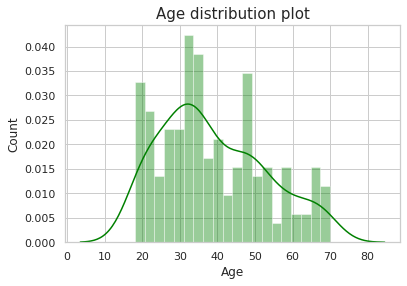

In [ ]:
# distribution plot for 'Age'
sns.distplot(record['Age'],color= 'green',bins=20)
plt.title('Age distribution plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This shows that our data has customer ranges from 10 years to 80 years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


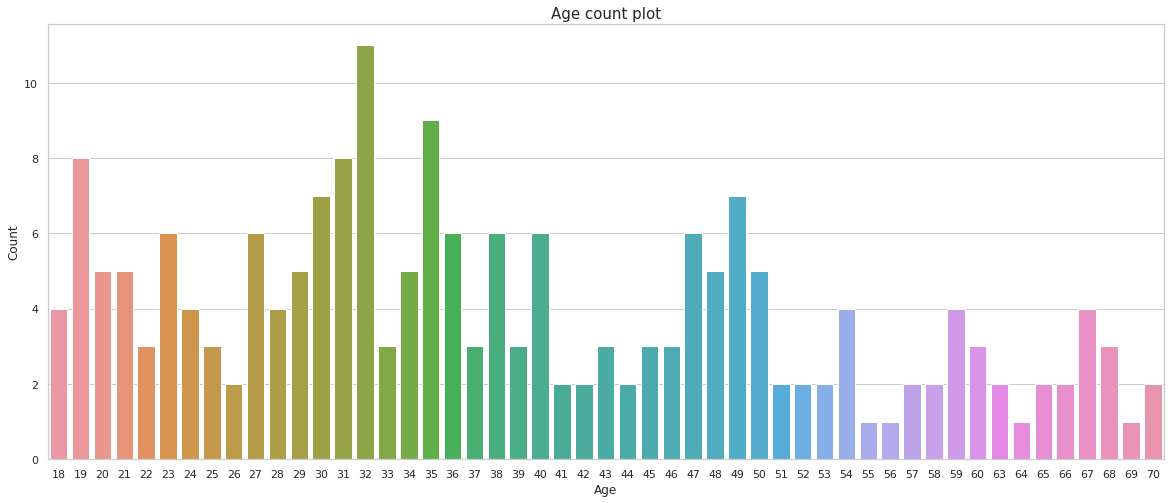

In [ ]:
# count plot for 'Age'
plt.figure(figsize=(20,8))
sns.countplot(record['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Age. Also we can see that 11 customers are 32 years old which is the most value count.

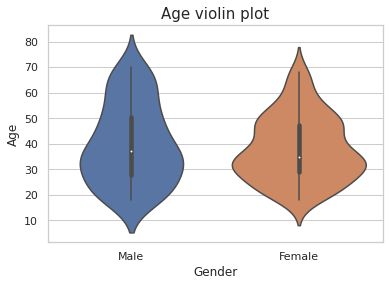

In [ ]:
# violin plot for 'Age'
sns.violinplot(y = 'Age' , x = 'Gender' , data = record)
plt.title('Age violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of female customer who belongs to age group of 30 years.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


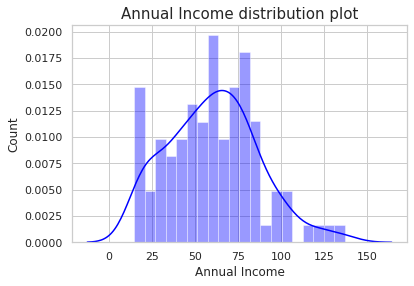

In [ ]:
# distribution plot for 'Annual Income'
sns.distplot(record['AnnualIncome'],color= 'blue',bins=20)
plt.title('Annual Income distribution plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

is shows that our data has customer ranges from income of 0k to 150k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


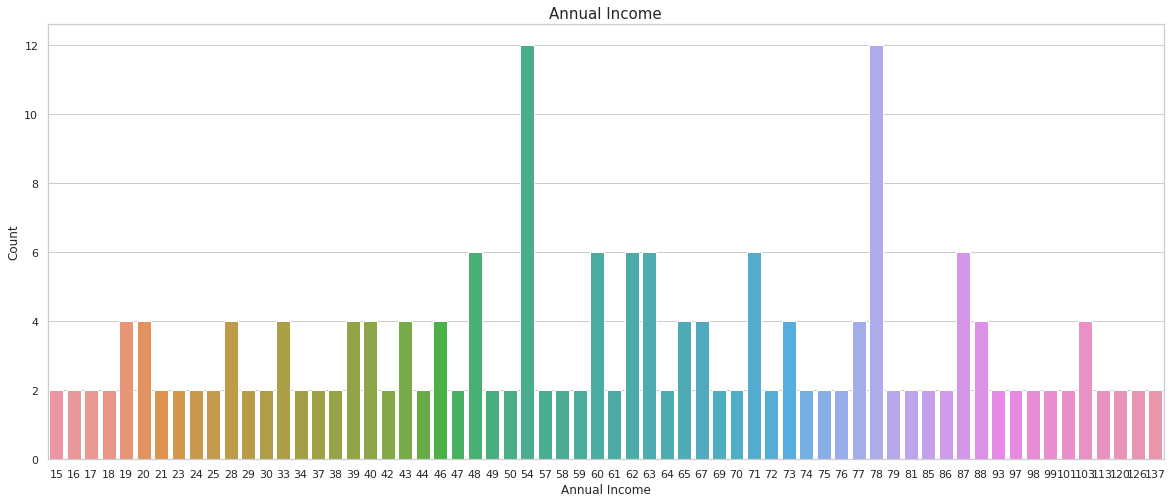

In [ ]:
# count plot for 'Annual Income'
plt.figure(figsize=(20,8))
sns.countplot(record['AnnualIncome'])
plt.title('Annual Income', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Income. Also we can see that 12-12 customers are 54 years and 78 years old which is the most value count.

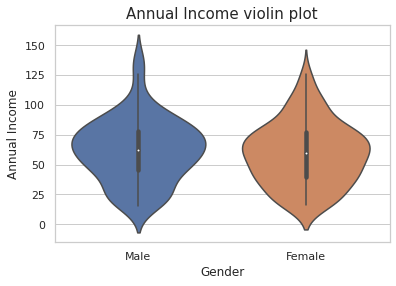

In [ ]:
# violin plot for 'Annual Income'
sns.violinplot(y = 'AnnualIncome' , x = 'Gender' , data = record)
plt.title('Annual Income violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Annual Income', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of male customer who have more income.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


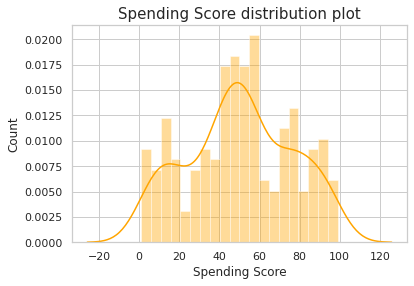

In [ ]:
# distribution plot for 'Spending Score'
sns.distplot(record['SpendingScore'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This shows that our data has customer ranges from with -20 to 120 spending score.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


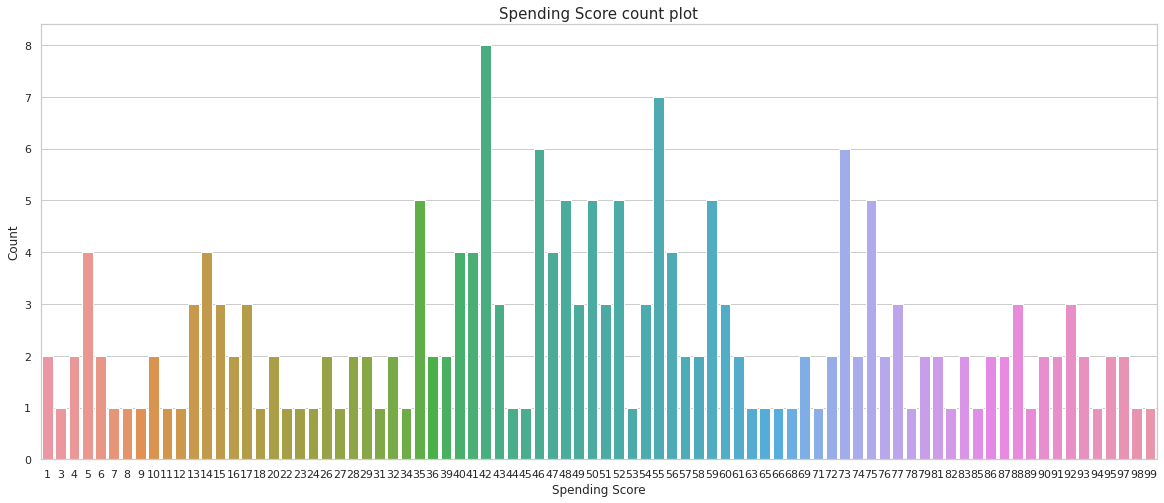

In [ ]:
# count plot for 'Spending Score'
plt.figure(figsize=(20,8))
sns.countplot(record['SpendingScore'])
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Age. Also we can see that 8 customers are 42 years old which is most value count.

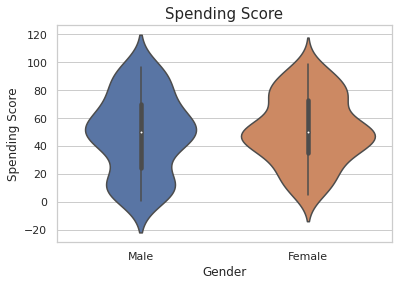

In [ ]:
# violin plot for 'Spending Score'
sns.violinplot(y = 'SpendingScore' , x = 'Gender' , data = record)
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of female customer who have mostly spending score around 50 .

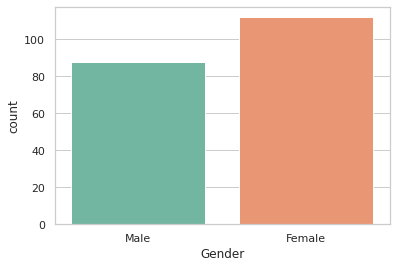

In [ ]:
sns.countplot(data=record,x='Gender',palette='Set2')

This plot clearly shows that we have more female customer compare to male customers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

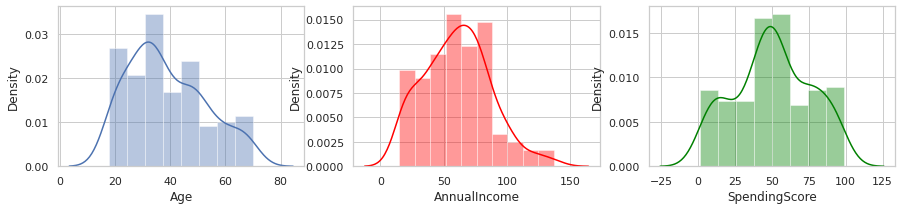

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(record['Age'])
plt.subplot(3,3,2)
sns.distplot(record['AnnualIncome'],color='red')
plt.subplot(3,3,3)
sns.distplot(record['SpendingScore'],color='green')

To get synapse view of all the three features together.

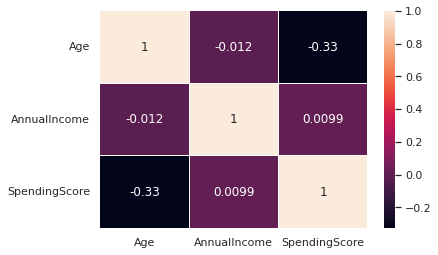

In [ ]:
sns.heatmap(record.iloc[:,1:5].corr(),annot=True,linewidths=0.2)

From this plot we got that income and spending score correlates to each other with a good score. But age and spending score does not correlates efficiently.

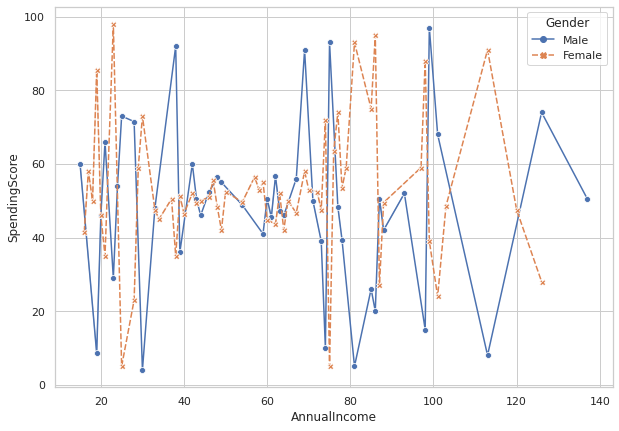

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='AnnualIncome',y='SpendingScore',hue='Gender',data=record,ci=False,style='Gender',markers=True)

To get the summary of spending score on the basis of annual income for male and female.

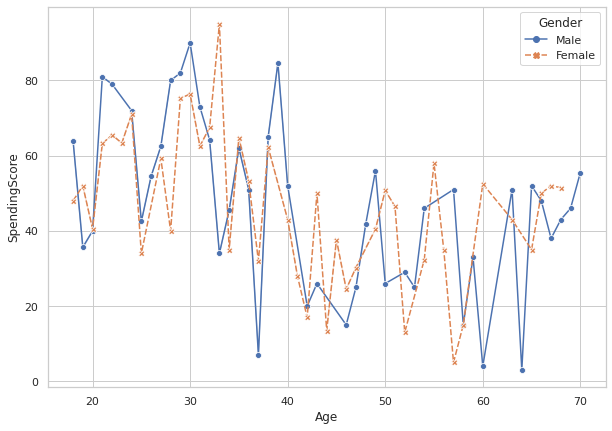

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Age',y='SpendingScore',hue='Gender',data=record,ci=False,style='Gender',markers=True)

This line plot shows the spending score on the basis of age for male and female.

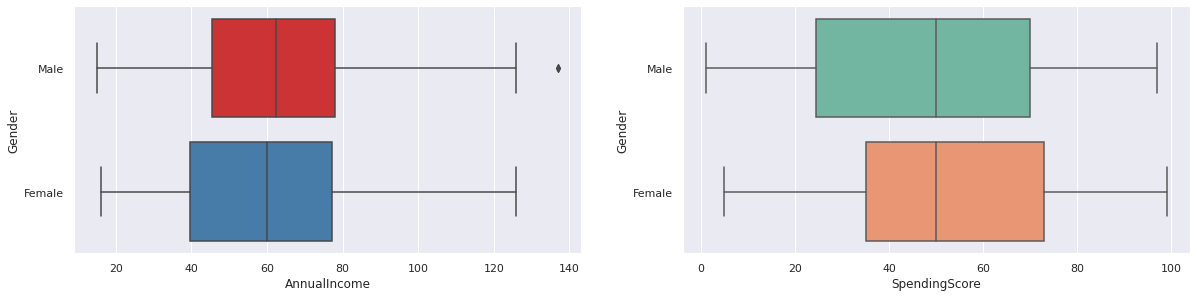

In [ ]:
plt.figure(figsize=(20,10))
x=0
for i in ['AnnualIncome','SpendingScore']:
    x=x+1
    plt.subplot(2,2,x)
    sns.boxplot(data=data_df,x=i,y='Gender',palette='Set'+str(x))
plt.show()

The above boxplots used to visualize distributions of Male and Female on the basis of Annual Income and Spending Score.

# **Cluster based on Annual Income and Spending Score**

The next few steps are to check if all the values in the dataset are non-null and contain proper numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [ ]:
lenc=LabelEncoder()
record['Gender']=lenc.fit_transform(record['Gender'])

In [ ]:
record.isna().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

It clearlly shows that there is no NULL value present in our dataframe.



In [ ]:
record.drop('CustomerID',axis=1,inplace=True)
record.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


First, lets check the elbow curve for different number of clusters using a forloop to append the values of inertia of the K-means algorithm into a list and plotting them for a range of 1-10 clusters. K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. Inertia tells us how far away the points within a cluster are. The value of inertia decreases as the number of clusters increase. The elbow point is the point in the graph when we notice a bend in the curve.

In [ ]:
from sklearn.cluster import KMeans

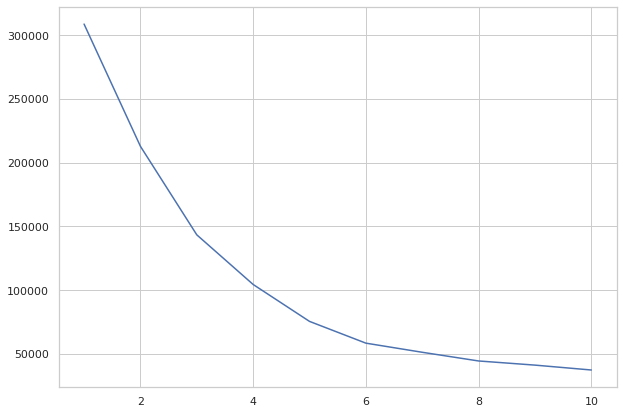

In [ ]:
cluster=list()
for i in range(1,11):
    kmns=KMeans(n_clusters=i)
    kmns.fit(record)
    cluster.append(kmns.inertia_)
plt.figure(figsize=(10,7))
sns.lineplot(x=list(range(1,11)),y=cluster)

It's notice 2 potential elbow points or "bends" i.e. one at approximately 3 and another at around 5. Thus we run K-means at both those points to form the requires clusters which we'll visualize eventually.

# **3 Clusters**

In [ ]:
n=3
kmeans3=KMeans(n_clusters=n,n_init=10,max_iter=500)
kmeans3.fit(record)

KMeans(max_iter=500, n_clusters=3)

In [ ]:
record['clusters']=kmeans3.labels_
kmeans3.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [ ]:
record.head()

,Gender,Age,AnnualIncome,SpendingScore,clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1


The silhouette score is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.The values of this score range from -1 to 1. Values almost equal to 0 indicate overlapping clusters. Values closer to 1 indicate the best possible clustering while negative values generally indicate that a sample has been assigned to the wrong cluster.

In [ ]:
print(silhouette_score(record.iloc[:,0:4],kmeans3.labels_))

0.383798873822341


**In the plot below, we can clearly notice 3 clusters distinguished by color. Thus K-means has performed its job and assigned proper clusters to the data points.**

In [ ]:
Income_Spend = record[['AnnualIncome' , 'SpendingScore']].iloc[: , :].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


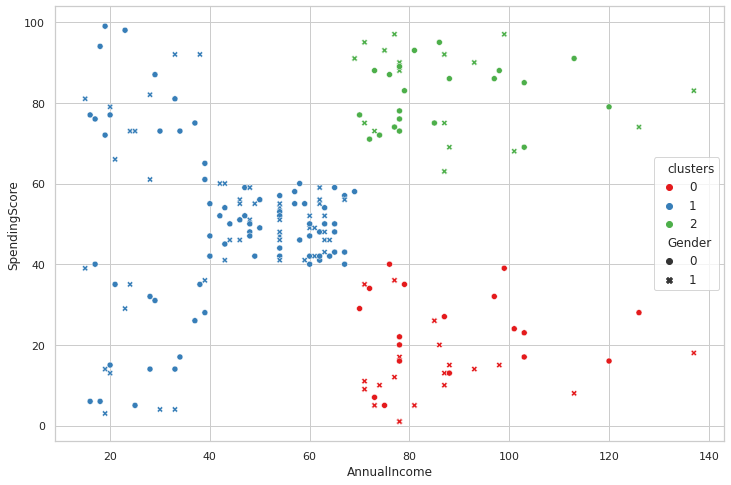

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(record['AnnualIncome'], record['SpendingScore'], hue=record['clusters'], palette='Set1',style=record['Gender'])


# **5 Clusters**

In [ ]:
n=5
kmeans5=KMeans(n_clusters=n,n_init=10,max_iter=500)
kmeans5.fit(record)

KMeans(max_iter=500, n_clusters=5)

In [ ]:
record['clusters']=kmeans5.labels_
kmeans5.cluster_centers_

array([[4.17721519e-01, 4.30886076e+01, 5.52911392e+01, 4.95696203e+01,
        9.74683544e-01],
       [4.61538462e-01, 3.26923077e+01, 8.65384615e+01, 8.21282051e+01,
        2.00000000e+00],
       [3.91304348e-01, 2.55217391e+01, 2.63043478e+01, 7.85652174e+01,
        1.00000000e+00],
       [5.27777778e-01, 4.06666667e+01, 8.77500000e+01, 1.75833333e+01,
        4.44089210e-16],
       [3.91304348e-01, 4.52173913e+01, 2.63043478e+01, 2.09130435e+01,
        1.00000000e+00]])

In [ ]:
record.head()

,Gender,Age,AnnualIncome,SpendingScore,clusters
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


In [ ]:
print(silhouette_score(record.iloc[:,0:4],kmeans5.labels_))

0.4440669204743008


We see and improvement in the silhouette score. Thus, plotting the clusters, we can distinguish the 5 groups.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


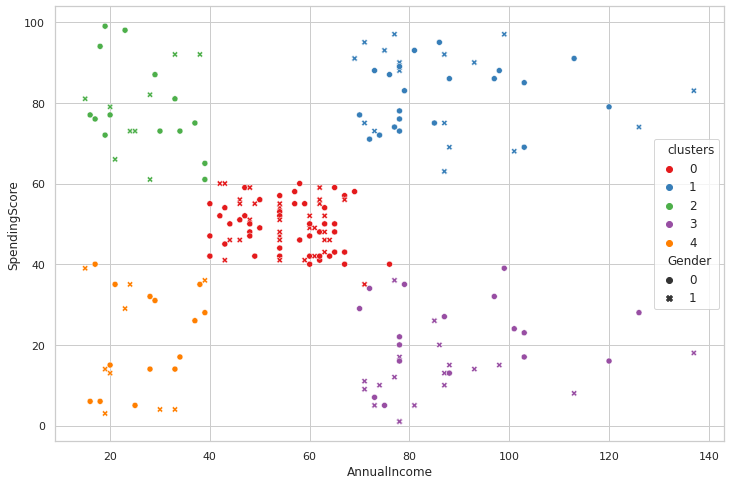

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(record['AnnualIncome'], record['SpendingScore'], hue=record['clusters'], palette='Set1',style=record['Gender'])